| **Inicio** | **atrás 16** | **Siguiente 18** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./16.Hiperparametros.ipynb)| [⏩](./18.Clustering.ipynb)|

# **17. Bagging en Machine learning: Conjuntos de Clasificadores o Regresores con Python**

## **Introducción**

El Bagging (Bootstrap Aggregating) es una técnica de ensamble en Machine Learning que consiste en entrenar múltiples clasificadores o regresores utilizando muestras `bootstrap` aleatorias del conjunto de datos original, y luego combinar sus predicciones mediante votación o promedio para obtener una predicción final.

En términos más simples, `Bagging` crea múltiples modelos de aprendizaje automático y los combina para obtener una predicción más precisa y estable. Cada modelo es entrenado en un conjunto de datos diferente que se obtiene al muestrear el conjunto de datos original con reemplazo. Al utilizar muestras `bootstrap` aleatorias, `Bagging` puede reducir la varianza de los modelos individuales y mejorar la precisión de la predicción final.

En Python, se puede implementar `Bagging` utilizando la clase ```BaggingClassifier``` o ```BaggingRegressor``` de la biblioteca `scikit-learn`. Estas clases permiten crear un conjunto de clasificadores o regresores y definir sus parámetros, como el número de modelos y la proporción de datos de entrenamiento a utilizar en cada modelo. Luego, se puede utilizar el método ```fit``` para entrenar el conjunto y ```predict``` para hacer predicciones en nuevos datos.

![Bagging](../imagenes%20Machine_Learning/Bagging.png "Bagging")

## **Datos para modelos**

Bagging se puede aplicar a varios tipos de modelos de clasificación o regresión en Machine Learning. Algunos ejemplos incluyen:

* **Árboles de decisión:** los árboles de decisión son modelos de aprendizaje automático que se utilizan tanto para la clasificación como para la regresión. Bagging con árboles de decisión puede mejorar la precisión de la predicción y reducir el sobreajuste.

* **Bosques aleatorios:** los bosques aleatorios son conjuntos de árboles de decisión que se combinan mediante votación o promedio. Bagging se utiliza a menudo en la construcción de bosques aleatorios para mejorar la precisión y reducir la varianza.

* **Regresión logística:** la regresión logística es un modelo de clasificación binaria que utiliza una función logística para estimar la probabilidad de pertenencia a una clase. Bagging con regresión logística puede mejorar la precisión de la clasificación y reducir el sesgo.

* **Redes neuronales:** las redes neuronales son modelos de aprendizaje profundo que se utilizan para la clasificación y la regresión. Bagging con redes neuronales puede mejorar la precisión de la predicción y reducir la varianza.

* **Máquinas de vectores de soporte (SVM):** las SVM son modelos de aprendizaje supervisado que se utilizan tanto para la clasificación como para la regresión. Bagging con SVM puede mejorar la precisión y la estabilidad de la predicción.

En resumen, Bagging se puede aplicar a una amplia gama de modelos de clasificación y regresión en Machine Learning. El tipo de modelo que se utiliza dependerá del problema específico y de la naturaleza de los datos disponibles.

## **Muestras para modelos**

En el contexto de Bagging, las muestras se refieren a subconjuntos aleatorios del conjunto de datos original utilizados para entrenar cada uno de los clasificadores o regresores en el conjunto Bagging.

La forma en que se seleccionan las muestras para cada clasificador o regresor depende del método de remuestreo que se utilice. Dos métodos comunes son:

* **Muestreo con reemplazo:** este método implica seleccionar aleatoriamente una muestra del conjunto de datos original con reemplazo (es decir, las mismas muestras pueden seleccionarse varias veces) para formar cada uno de los subconjuntos utilizados para entrenar cada clasificador o regresor en el conjunto Bagging. Este método es comúnmente utilizado en Bagging.

* **Muestreo sin reemplazo:** este método implica seleccionar aleatoriamente una muestra del conjunto de datos original sin reemplazo (es decir, cada muestra solo puede seleccionarse una vez) para formar cada uno de los subconjuntos utilizados para entrenar cada clasificador o regresor en el conjunto Bagging. Este método es menos común en Bagging pero puede ser utilizado en otros enfoques de conjunto, como Pasting.

En general, el tamaño de las muestras utilizadas para entrenar cada clasificador o regresor en el conjunto Bagging se establece en función del tamaño del conjunto de datos original y de la cantidad de clasificadores o regresores en el conjunto. Una regla general común es utilizar aproximadamente el `50-70%` del conjunto de datos original para cada subconjunto en el conjunto Bagging.

En resumen, las muestras utilizadas en Bagging se refieren a subconjuntos aleatorios del conjunto de datos original utilizados para entrenar cada clasificador o regresor en el conjunto. El tamaño de las muestras y el método de remuestreo utilizado dependen del problema específico y del enfoque de conjunto utilizado.

## **Escalamiento de los datos**

El escalamiento de datos es un preprocesamiento comúnmente utilizado en Bagging y otros enfoques de aprendizaje automático para mejorar la precisión y la estabilidad de los modelos. El escalamiento de datos se refiere a la transformación de las características (o variables) de los datos para que se encuentren en una escala común.

El escalamiento de datos es importante en Bagging porque cada clasificador o regresor en el conjunto se entrena con una muestra aleatoria del conjunto de datos original, lo que significa que cada clasificador o regresor puede ver diferentes valores de las características. El escalamiento de datos puede ayudar a reducir la varianza entre los clasificadores o regresores en el conjunto Bagging al garantizar que las características se encuentren en la misma escala para cada clasificador o regresor.

Algunos métodos comunes de escalamiento de datos incluyen:

* **Escalamiento min-max:** este método escala las características de los datos para que se encuentren dentro de un rango específico (por ejemplo, entre 0 y 1 o entre -1 y 1). El método funciona restando el valor mínimo de cada característica y dividiendo por el rango de la característica.

* **Normalización:** este método escala las características de los datos para que tengan una media de cero y una desviación estándar de uno. El método funciona restando la media de cada característica y dividiendo por la desviación estándar de la característica.

* **Escalamiento de unidad:** este método escala las características de los datos para que tengan una norma euclidiana de uno. El método funciona dividiendo cada característica por la norma euclidiana de todas las características.

En resumen, el escalamiento de datos es un preprocesamiento comúnmente utilizado en Bagging para mejorar la precisión y la estabilidad de los modelos. Los métodos comunes de escalamiento de datos incluyen el escalamiento `min-max`, la normalización y el escalamiento de unidad. La elección del método de escalamiento de datos depende del tipo de datos y del problema específico.

## **Visualización de los datos**

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)


A continuación, dividimos los datos en conjuntos de entrenamiento y prueba:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Luego, creamos un clasificador de árbol de decisión y lo combinamos con Bagging:

In [5]:
tree = DecisionTreeClassifier()
bagging = BaggingClassifier(tree, n_estimators=100, max_samples=0.5, max_features=0.5)


En este caso, estamos creando un clasificador de árbol de decisión y aplicando Bagging con 100 estimadores (clasificadores) en el conjunto Bagging. Además, estamos configurando los parámetros ```max_samples``` y ```max_features``` para que cada clasificador solo vea una muestra aleatoria del 50% y una selección aleatoria del 50% de las características en cada entrenamiento.

Entrenamos el modelo en los datos de entrenamiento:

In [6]:
bagging.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, n_estimators=100)

Finalmente, podemos evaluar el modelo en los datos de prueba y mostrar la precisión del modelo:

In [7]:
score = bagging.score(X_test, y_test)
print(f"Precisión del modelo: {score:.3f}")


Precisión del modelo: 1.000


Podemos también graficar la importancia de cada característica según el modelo entrenado:

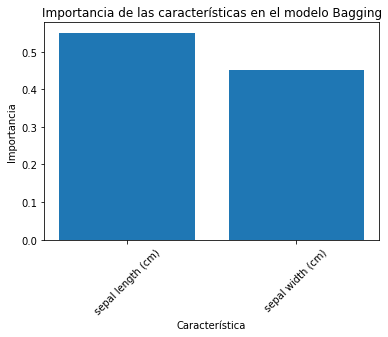

In [10]:
importance = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
feature_names = iris.feature_names
sorted_idx = importance.argsort()[::-1]
plt.bar([feature_names[i] for i in sorted_idx], [importance[i] for i in sorted_idx])
plt.title("Importancia de las características en el modelo Bagging")
plt.xlabel("Característica")
plt.ylabel("Importancia")
plt.xticks(rotation=45)
plt.show()


## **Explicación breve de KNN**

`KNN` (K-Nearest Neighbors) es un algoritmo de aprendizaje automático utilizado para la clasificación y la regresión. La idea básica detrás de `KNN` es que los objetos similares tienden a estar en la misma zona en el espacio de características.

![KNN](../imagenes%20Machine_Learning/KNN.webp "KNN")

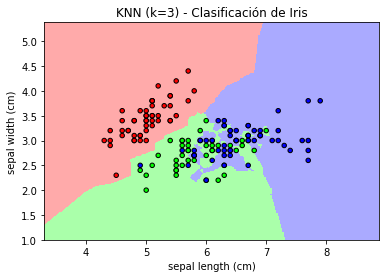

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Cargamos el dataset Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomamos las dos primeras características para visualizar
y = iris.target

# Entrenamos un modelo KNN con k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Visualizamos los resultados
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Creamos una malla de puntos que cubra todo el espacio de características
h = .02  # tamaño de paso en la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Clasificamos cada punto de la malla
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Ponemos el resultado en una trama de color
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Graficamos los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k=3) - Clasificación de Iris")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


## **Metamodelos Bagging**

Los metamodelos Bagging son un tipo de modelo de ensamblado que utilizan el método de Bagging para combinar múltiples modelos de aprendizaje automático. El objetivo de este enfoque es mejorar la precisión y la estabilidad del modelo mediante la combinación de varios modelos independientes.

Un ejemplo de metamodelo Bagging es el `Random Forest`, que es un conjunto de árboles de decisión construidos a partir de subconjuntos aleatorios del conjunto de datos original. Cada árbol en el `Random Forest` se entrena de manera independiente y luego se combina para producir una predicción final.

A continuación se muestra un ejemplo de cómo implementar un metamodelo Bagging utilizando `Random Forest` en Python:

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# generar un conjunto de datos sintético
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# construir el modelo Bagging utilizando Random Forest
bagging = RandomForestClassifier(n_estimators=10, random_state=42)

# ajustar el modelo a los datos de entrenamiento
bagging.fit(X_train, y_train)

# hacer predicciones en el conjunto de datos de prueba
y_pred = bagging.predict(X_test)

# evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))


Precisión del modelo: 94.50%


El código anterior genera un conjunto de datos sintético y lo divide en conjuntos de entrenamiento y prueba. Luego, se construye un modelo Bagging utilizando `Random Forest` con 10 árboles de decisión. El modelo se ajusta a los datos de entrenamiento y se utilizan para hacer predicciones en el conjunto de datos de prueba. Finalmente, se evalúa la precisión del modelo utilizando la métrica de precisión y se muestra en pantalla.

También podemos visualizar la importancia de las características en el modelo utilizando un gráfico de barras. El código para hacerlo sería el siguiente:

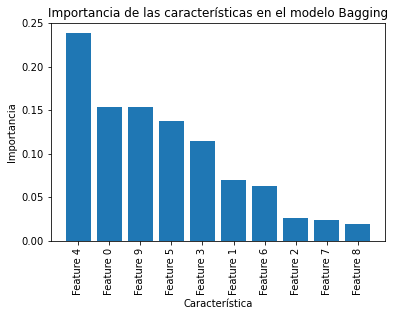

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# obtener la importancia de las características del modelo
importance = bagging.feature_importances_

# obtener los nombres de las características
feature_names = ['Feature {}'.format(i) for i in range(X.shape[1])]

# ordenar las características por importancia
sorted_idx = importance.argsort()[::-1]

# crear un gráfico de barras para mostrar la importancia de las características
plt.bar(range(X.shape[1]), importance[sorted_idx])
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_idx], rotation=90)
plt.title("Importancia de las características en el modelo Bagging")
plt.xlabel("Característica")
plt.ylabel("Importancia")
plt.show()


El código anterior utiliza la función ```feature_importances_``` para obtener la importancia de las características del modelo Bagging. Luego, se ordenan las características por importancia y se crea un gráfico de barras para mostrar la importancia de cada característica. La salida sería un gráfico que muestra la importancia de cada característica en el modelo, ordenadas de mayor a menor importancia

| **Inicio** | **atrás 16** | **Siguiente 18** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./16.Hiperparametros.ipynb)| [⏩](./18.Clustering.ipynb)|